In [5]:
import numpy as np
import pybamm
import gurobipy as gp
import pandas as pd

from nemosis import dynamic_data_compiler


In [13]:
start_time = '2024/06/01 00:00:00'
end_time = '2025/06/01 00:00:00'
table = 'DISPATCHPRICE'
raw_data_cache = 'cache'

price_data = dynamic_data_compiler(start_time, end_time, table, raw_data_cache, filter_cols=["REGIONID"], filter_values=[["QLD1"]])


INFO: Compiling data for table DISPATCHPRICE


INFO: Returning DISPATCHPRICE.


In [14]:
price_data

,SETTLEMENTDATE,REGIONID,INTERVENTION,RRP,RAISE6SECRRP,RAISE60SECRRP,RAISE5MINRRP,RAISEREGRRP,LOWER6SECRRP,LOWER60SECRRP,LOWER5MINRRP,LOWERREGRRP,PRICE_STATUS
1,2024-06-01 00:05:00,QLD1,0,173.00503,0.86,0.79,0.39,7.7300,0.00,0.07,0.01,1.50,FIRM
6,2024-06-01 00:10:00,QLD1,0,148.26320,7.32,2.14,0.71,3.3800,0.14,0.38,0.08,0.08,FIRM
11,2024-06-01 00:15:00,QLD1,0,155.77123,1.84,0.86,0.39,5.5641,0.03,0.15,0.01,3.62,FIRM
16,2024-06-01 00:20:00,QLD1,0,159.49941,1.84,0.86,0.39,3.3800,0.01,0.15,0.08,1.12,FIRM
21,2024-06-01 00:25:00,QLD1,0,173.00368,1.48,0.72,0.39,6.0000,0.01,0.15,0.01,3.61,FIRM
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,2025-05-31 23:40:00,QLD1,0,133.30708,0.38,0.23,0.24,5.0000,0.10,0.38,0.00,0.00,FIRM
44621,2025-05-31 23:45:00,QLD1,0,134.91113,0.38,0.15,0.09,0.0900,0.10,0.38,0.04,1.00,FIRM
44626,2025-05-31 23:50:00,QLD1,0,129.45000,0.38,0.36,0.36,5.4600,0.10,0.38,0.10,4.94,FIRM
44631,2025-05-31 23:55:00,QLD1,0,123.51577,0.38,0.15,0.10,0.1000,0.10,0.38,0.04,4.96,FIRM


In [7]:
price_data['SETTLEMENTDATE'] = pd.to_datetime(price_data["SETTLEMENTDATE"])
price_data = price_data.set_index("SETTLEMENTDATE")

In [31]:
price_data.to_csv("dispatch_price.csv", index=True)

In [34]:
price_data["RRP"].iloc[0]

173.00503

In [ ]:
battery_capacity = 202600
P_max = 60000
efficiency = 0.969
max_doc = 0.1
max_hoc = 1
dt = 5/60

In [ ]:
model = g

In [ ]:
models = [
    pybamm.lithium_ion.SPM(),
    pybamm.lithium_ion.SPMe(),
    pybamm.lithium_ion.DFN(),
]

In [ ]:
sims = []
for model in models:
    sim = pybamm.Simulation(model)
    sim.solve([0, 3600])
    sims.append(sim)

/usr/local/lib/python3.12/site-packages/pybamm/simulation.py:122: UserWarning: The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
  self._solver = solver or self._model.default_solver


In [16]:
import pvlib, pytz

In [17]:
lc = pvlib.location.Location(latitude=-27.4705, longitude=153.0260)
aest_tz = pytz.timezone("Australia/Brisbane")

tmy_df, _ = pvlib.iotools.get_pvgis_tmy(-27.4705, 153.0260)
tmy_df.index = tmy_df.index.tz_convert(aest_tz)

<Axes: xlabel='time(UTC)'>

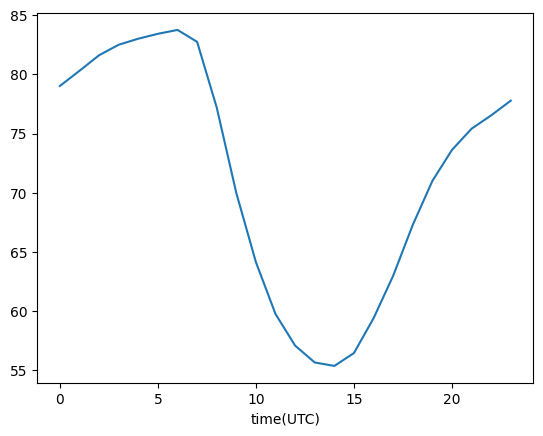

In [29]:
tmy_df.groupby(tmy_df.index.hour).mean()['relative_humidity'].plot.line()